In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()

## Load the data

In the Kaggle competition site are 3 different data sets but we just want to work with the train.csv and test.csv files

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
result = test.copy()
result = result[['PassengerId']]
#result

## EDA

We first want to understand the structure and some basic features of the train dataset. The train data set is the one that have the label data to train our model, so that's the data set we need to explore.

It's also useful to have the columns descriptions provided in the documentation of the dataset:

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


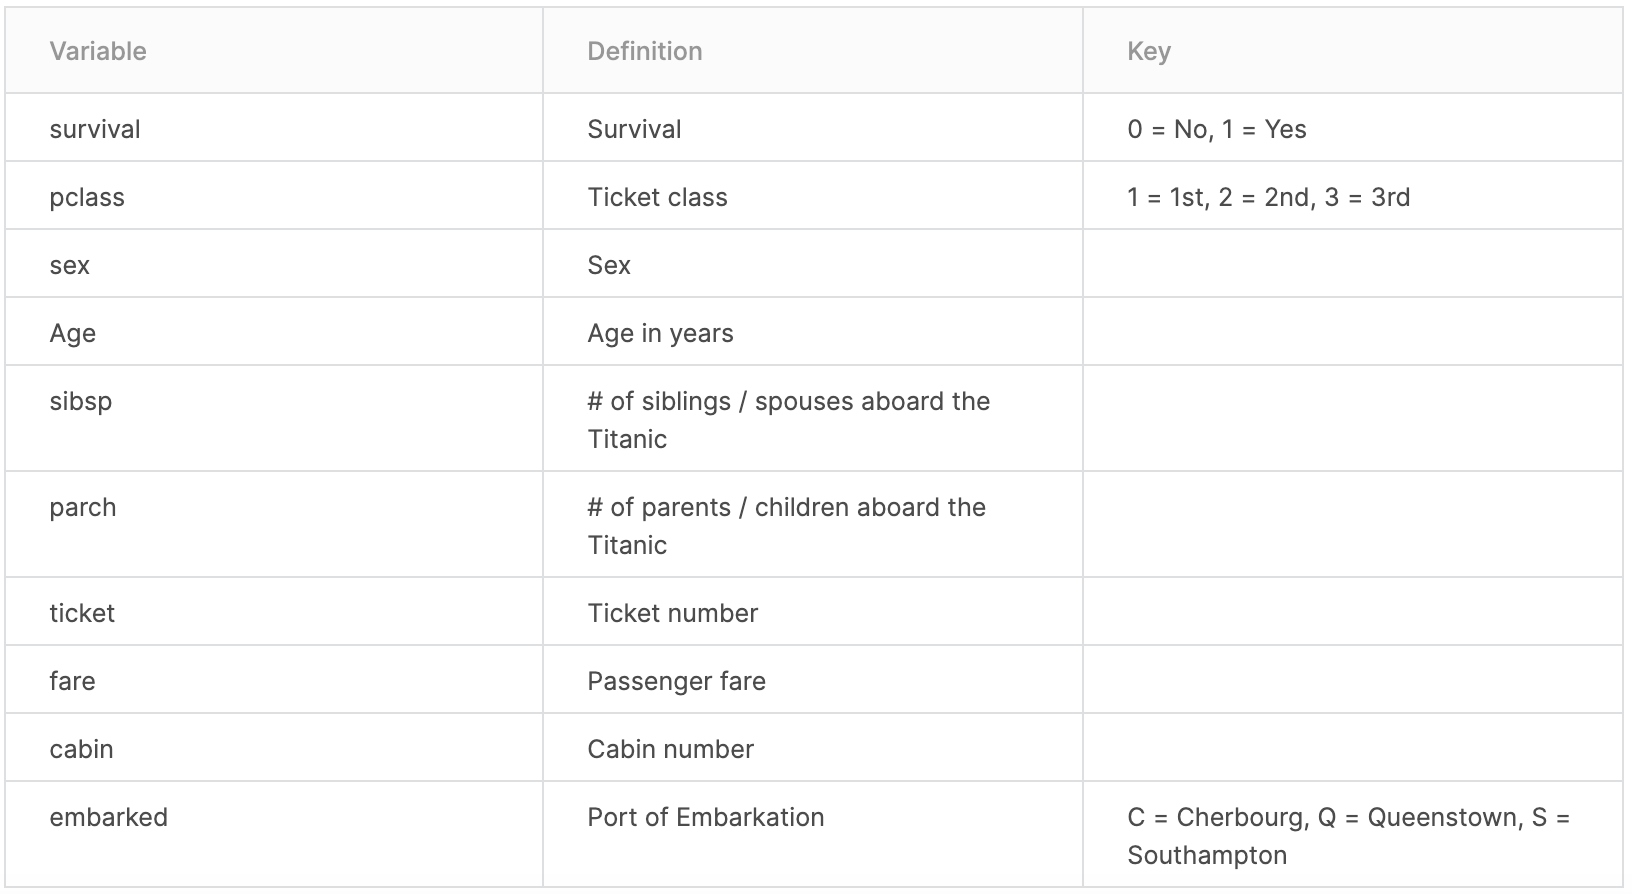

In [5]:
from IPython.display import Image
Image(filename='dictionary.png', width=800)

In [6]:
train.rename(columns = lambda col:col.lower(), inplace=True)
test.rename(columns = lambda col:col.lower(), inplace=True)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
passengerid    891 non-null int64
survived       891 non-null int64
pclass         891 non-null int64
name           891 non-null object
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
ticket         891 non-null object
fare           891 non-null float64
cabin          204 non-null object
embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that there are some missing data in the 'age', 'cabin' and 'embarked' columns

In [8]:
train.shape

(891, 12)

In [9]:
print('Description of numeric variables:')
train.describe()

Description of numeric variables:


,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
print('Description of categorical variables:')
train.describe(include='O')

Description of categorical variables:


,name,sex,ticket,cabin,embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Thayer, Mrs. John Borland (Marian Longstreth M...",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


We can see those things from the above descriptions:

- The average age of the passangers are 29.6 years but we have a std of 14 years so we have people of different ages onboard the titanic
- There are babies on board because the minumun age is 0.42 years and the oldest person was 80.

We can plot the distribution of different columns to visualize these data.

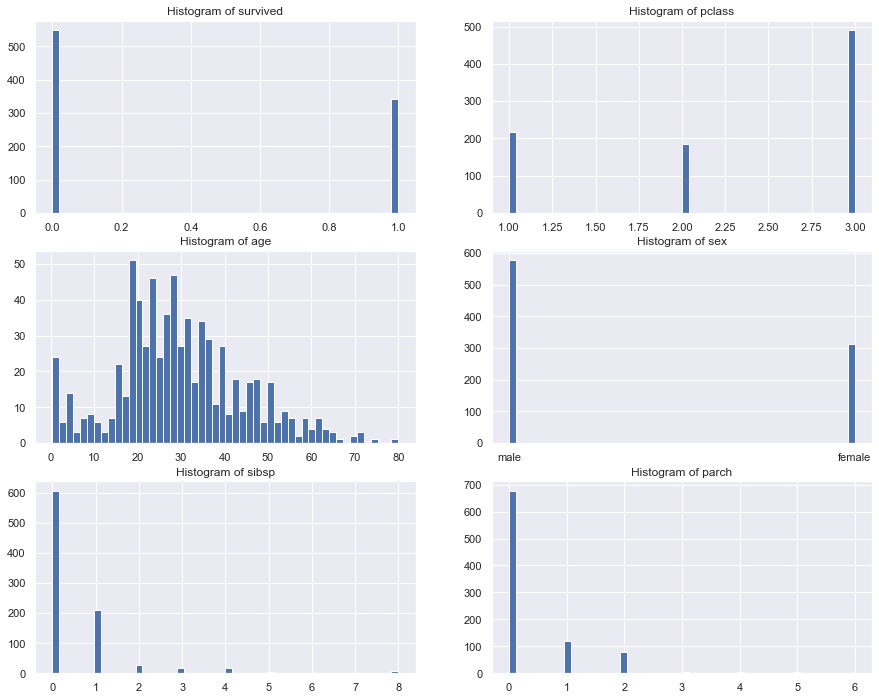

In [11]:
plt.figure(figsize=(15,12))
vars_to_plot = ['survived', 'pclass', 'age', 'sex', 'sibsp', 'parch']
for i, var in enumerate(vars_to_plot):
    plt.subplot(3,2,i+1)
    plt.hist(train[var],50)
    title_string = 'Histogram of ' + var
    plt.title(title_string)

From the distribution we also see that:

- Most of the people died
- Most of the people were from 3rd class
- The distribution of age is skewed to the left around 30 years
- Most of the peaple were males
- Most of the people traveled without siblings/spouse or parents/childrens

So one good idea is maybe try to understand the distributions of these variables in more detail, maybe the age by sex, or the distribution of age by class and see if we have more young people in the cheapest class of the Titanic. We have to keep in mind that we need to understand the situation of what the data is talking about to start our analisys.

Text(0.5, 1.0, 'Density plot of age by gender')

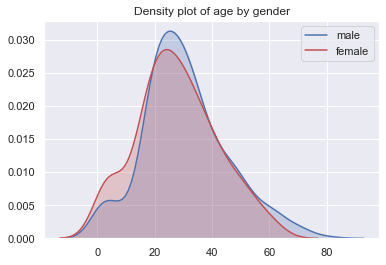

In [12]:
sns.kdeplot(train.loc[train['sex'] == 'male', 'age'],shade = True, label='male',color="b")
sns.kdeplot(train.loc[train['sex'] == 'female', 'age'],shade = True, label='female',color="r")
plt.title('Density plot of age by gender')

- Kids under 10 were mostly female
- In general, women and men had similar average age

Text(0.5, 1.0, 'Density plot of age by ticket class')

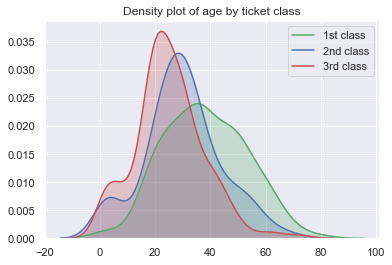

In [13]:
sns.kdeplot(train.loc[train['pclass'] == 1, 'age'],shade = True, label='1st class',color="g")
sns.kdeplot(train.loc[train['pclass'] == 2, 'age'],shade = True, label='2nd class',color="b")
sns.kdeplot(train.loc[train['pclass'] == 3, 'age'],shade = True, label='3rd class',color="r")
plt.title('Density plot of age by ticket class')

- In 3rd class are older people than in 2nd and 1st, but also the 2nd class is older than 1st
- There were no to many children < 10 years in 1st class, those kids were from 2nd and 3rd
- The majority of People from 50 to 80 years were from the 1st class

In [14]:
pd.crosstab(train['sex'],train['pclass'])

pclass,1,2,3
sex,,,
female,94,76,144
male,122,108,347


From these observations we can now decide which other features we can add, as far we know that there are 3 classes, and we also explore the age and sex distributions and we know most of the people died.

We are not already worked with the sibsp and parch variables, and here we know from the description of the data set that these numbers are related with the companions of each people, so we can know if someone is traeveling with some relative or not. Maybe this could be importan at the time to survived in the Titanic

In order to know if someone is traveling alone we can use the 'sibsp' and 'parch' if the sum of these two columns is 0 we can say that is traveling without family or relatives.

In [15]:
train['tot_relative'] = train['sibsp'] + train['parch']
train['relative'] = np.where(train['tot_relative']>0,1,0)

test['tot_relative'] = test['sibsp'] + test['parch']
test['relative'] = np.where(test['tot_relative']>0,1,0)

Now we can explore the data using the new features 'relative' and 'tot_relative'

In [16]:
pd.crosstab(train['survived'],train['pclass'])

pclass,1,2,3
survived,,,
0,80,97,372
1,136,87,119


In [17]:
pd.crosstab(train['survived'],train['relative'])

relative,0,1
survived,,
0,374,175
1,163,179


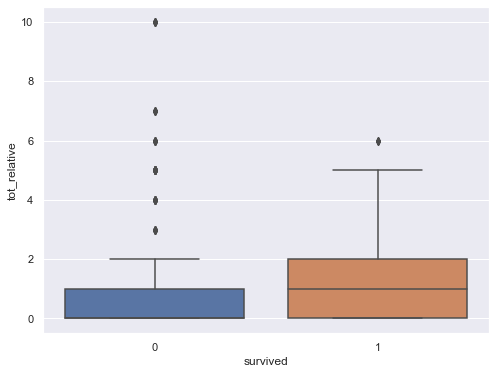

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(x='survived', y='tot_relative', data=train)

Text(0.5, 1.0, 'Density plot of age by survival')

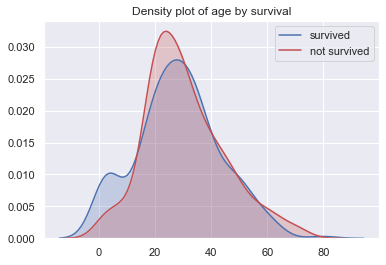

In [19]:
sns.kdeplot(train.loc[train['survived'] == 1, 'age'],shade = True, label='survived',color="b")
sns.kdeplot(train.loc[train['survived'] == 0, 'age'],shade = True, label='not survived',color="r")
plt.title('Density plot of age by survival')

In [20]:
pd.crosstab(train['survived'],train['sex'])

sex,female,male
survived,,
0,81,468
1,233,109


- Maybe there is a relation between survived and travel without family
- I want to check if there is a relation between age and sex with survived because in the movie they said "Women and Children first"
- from the previous distribution we can see that most of the children under 10 survived and also the proportion of women that survived is much grater than men.

Now we can check the correlations between the predictors variables and our respose variable

In [21]:
train.corr()[['survived']].sort_values(by='survived', ascending = False)

,survived
survived,1.000000
fare,0.257307
relative,0.203367
parch,0.081629
tot_relative,0.016639
passengerid,-0.005007
sibsp,-0.035322
age,-0.077221
pclass,-0.338481


- Fare seem to be positively correlated with survival and pclass negatively so it means that maybe you had a higher probaility of survive if you are in 1st class
- Also it looks like traveling alone gives you less oportunity to survive. we nee to be careful because this might be a counfunding variable
- Finally, older people looks to had a less chance to survive

The features that we selected for fit a model are:

- Sex
- Age
- Pclass
- tot_relative

We drop the other features

In [22]:
train = train.drop(['passengerid','name','sibsp','parch','ticket','cabin','embarked','tot_relative','fare'], axis=1)
test = test.drop(['passengerid','name','sibsp','parch','ticket','cabin','embarked','tot_relative','fare'], axis=1)

In [23]:
train.isnull().sum()

survived      0
pclass        0
sex           0
age         177
relative      0
dtype: int64

In [24]:
test.isnull().sum()

pclass       0
sex          0
age         86
relative     0
dtype: int64

Now we need to deal with the NAs, almost 10% of the ages has missing data so maybe if we can impute the missing data with the average age

In [25]:
train['age'].fillna(train['age'].mean(), inplace = True)
test['age'].fillna(test['age'].mean(), inplace = True)

In [26]:
train.isnull().sum()

survived    0
pclass      0
sex         0
age         0
relative    0
dtype: int64

We want to convert our categorical variables in numeric variables

In [27]:
train.sex[train['sex']=='male'] = 1
train.sex[train['sex']=='female'] = 0
test.sex[test['sex']=='male'] = 1
test.sex[test['sex']=='female'] = 0

In [28]:
train.head()
#test.head()

,survived,pclass,sex,age,relative
0,0,3,1,22.0,1
1,1,1,0,38.0,1
2,1,3,0,26.0,0
3,1,1,0,35.0,1
4,0,3,1,35.0,0


In [29]:
X_test = test.copy()
X_train = train.drop(['survived'], axis=1)
y_train = train['survived']

## Model

As our result variable is categorical we can fit a logistic regression and see how accurate it is:

In [72]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_test_logreg = logreg.predict(X_test)
logreg.score(X_train, y_train)

0.8002244668911336

I'm familiarized with decision trees and this model also works for categorical target variables. So I think we can run that model and see if we can achieve a higher score

In [67]:
tree = DecisionTreeClassifier(max_depth=5, random_state=34)
tree.fit(X_train, y_train)
y_test_tree=tree.predict(X_test)
tree.score(X_train, y_train)

0.8282828282828283

The decision tree get a higher score than the Logistic regression, so we choose the Decision Tree model

In [32]:
result = pd.DataFrame({'PassengerId': result['PassengerId'], 'Survived': y_test_tree})

In [33]:
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0


In [34]:
result.to_csv('results.csv', index=False)

## Takeaways

- I know there are so many more models but I prefer to start with a simple one, and present a model that I know how it works. Try different models that you don't know is like just copying the code and see what happens...

- I also know that are techniques to tune the models I don't have too much experience with that so it will take a long time to do it.